# Results evaluation of Space Saving Count

## Pre-processing

In [1]:
from counters import *
import matplotlib
import matplotlib.pyplot as plt

## Defining necessary functions

In [2]:
def get_arrays(file_path, epsilon):
    # we calculate exact values to compare afterwards
    counter_exact = ExactCounter(file_path, epsilon)
    counter_exact.count()
    exact_dict = counter_exact.getDict()
    #print(exact_dict)

    # we calculate the values with space saving
    counter_space_saving = SpaceSavingCounter(file_path, epsilon)
    counter_space_saving.count()
    space_dict = counter_space_saving.getDict()
    #print(space_dict)
    return exact_dict, space_dict

## Calling space saving count with increasing epsilon

In [3]:
file_path = '../texts/czech1.txt'
epsilon = 0.1

array_y = []
array_x = []

while True:
    if epsilon <= 0.0002:
        break
    epsilon = epsilon - 0.0002
    
    exact_dict, space_dict = get_arrays(file_path, epsilon)

    # Results analysis
    exact_array = [item[0] for item in exact_dict]
    space_array = [item[0] for item in space_dict]
    
    length = len(exact_dict)
    accuracy = len(list(filter(lambda x: x in exact_array, space_array))) / length
    
    array_x.append(epsilon)
    array_y.append(accuracy)

## Accuracy Analysis

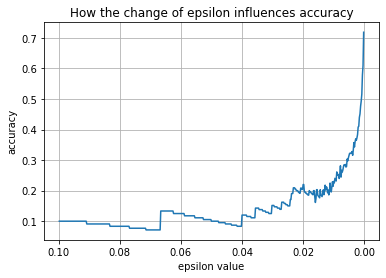

In [4]:
fig, ax = plt.subplots()
ax.plot(array_x, array_y)

ax.set(xlabel='epsilon value', ylabel='accuracy',
       title='How the change of epsilon influences accuracy')
ax.invert_xaxis()
ax.grid()